# Get Data

In [1]:
!wget https://cloud.isir.upmc.fr/owncloud/index.php/s/WMiMAF4aQqjoZWe/download

--2021-12-14 18:52:17--  https://cloud.isir.upmc.fr/owncloud/index.php/s/WMiMAF4aQqjoZWe/download
Resolving cloud.isir.upmc.fr (cloud.isir.upmc.fr)... 134.157.18.29
Connecting to cloud.isir.upmc.fr (cloud.isir.upmc.fr)|134.157.18.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1056301439 (1007M) [application/zip]
Saving to: ‘download’

download            100%[===================>]   1007M  28.9MB/s    in 35s     

2021-12-14 18:52:53 (28.4 MB/s) - ‘download’ saved [1056301439/1056301439]



In [2]:
!unzip download

Streaming output truncated to the last 5000 lines.
  inflating: helen/trainset/2169601621_1.jpg  
  inflating: helen/trainset/2169601621_1.pts  
  inflating: helen/trainset/2170250827_1.jpg  
  inflating: helen/trainset/2170250827_1.pts  
  inflating: helen/trainset/2170402460_1.jpg  
  inflating: helen/trainset/2170402460_1.pts  
  inflating: helen/trainset/21705205_1.jpg  
  inflating: helen/trainset/21705205_1.pts  
  inflating: helen/trainset/21710996_1.jpg  
  inflating: helen/trainset/21710996_1.pts  
  inflating: helen/trainset/2172479811_1.jpg  
  inflating: helen/trainset/2172479811_1.pts  
  inflating: helen/trainset/2173271902_1.jpg  
  inflating: helen/trainset/2173271902_1.pts  
  inflating: helen/trainset/2175042512_1.jpg  
  inflating: helen/trainset/2175042512_1.pts  
  inflating: helen/trainset/2175629058_1.jpg  
  inflating: helen/trainset/2175629058_1.pts  
  inflating: helen/trainset/2177168298_1.jpg  
  inflating: helen/trainset/2177168298_1.pts  
  inflating: hele

# import

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
from random import randrange
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import cv2
from google.colab import drive
#drive.mount('/content/gdrive')

# parse train

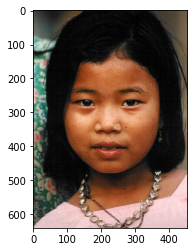

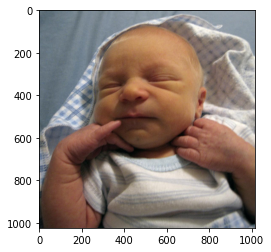

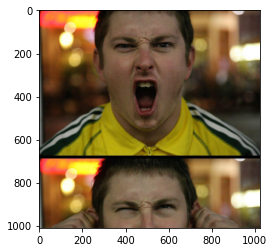

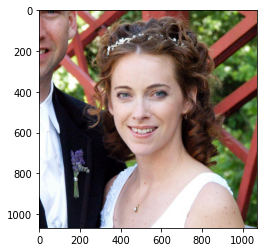

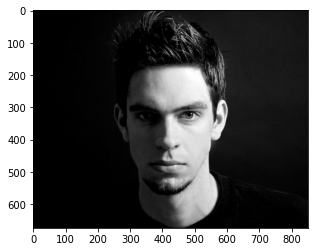

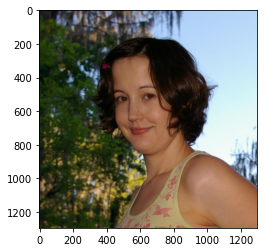

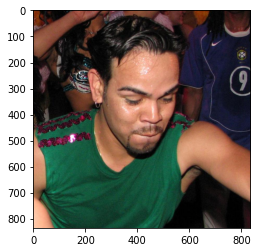

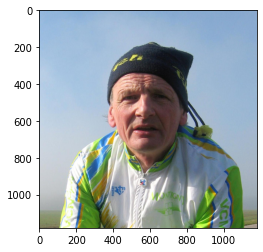

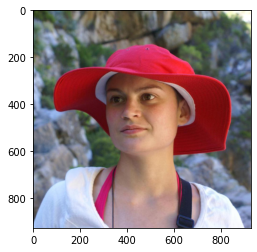

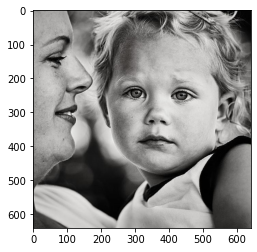

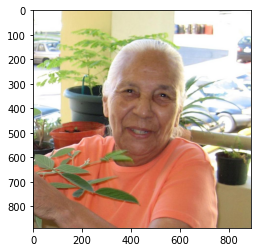

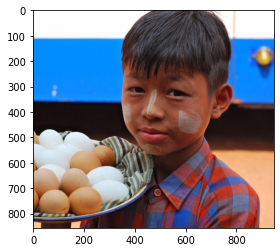

In [43]:
#parse 300w_train_image.txt
def parse(file):
    f = open(file)
    images=[]
    for line in f.readlines():
        images.append(line)
    return images

def plot_images_alea(images, n=12):
        for i in range(n):
            index = randrange(len(images))
            img = Image.open(images[index].split("\n")[0])
            plt.imshow(img)
            plt.show()
        
def get_images(images):
    imgs=[]
    for img in images:
        img = Image.open(img.split("\n")[0])
        imgs.append(img)
    return imgs  

images_file = parse("300w_train_images.txt")[:1000]
plot_images_alea(images_file)
images = get_images(images_file)[:1000]

# Box

In [44]:
#1 compute Bbox from landmarks

def Bbox(file):
    f = open(file.split(".")[0] + ".pts")
    landmarks = []
    min_x = np.inf
    max_x =-1
    min_y = np.inf
    max_y =-1
    landmarks=[]
    for line in f.readlines():
        x_ldm = float(line.split(" ")[0])
        y_ldm = float(line.split(" ")[1].split("\n")[0])
        landmarks.append([x_ldm, y_ldm])
        if x_ldm < min_x:
            min_x=x_ldm  
        if x_ldm >= max_x:
            max_x = x_ldm
        if y_ldm < min_y:
            min_y=y_ldm 
        if y_ldm >= max_y:
            max_y = y_ldm
    return [min_x, max_x, min_y, max_y], landmarks
    
bboxs=[]
landmarks=[]
for img in images_file:
    bb, ldm = Bbox(img)
    bboxs.append(bb)
    landmarks.append(ldm)

bboxs_30 =[]
for bbox in bboxs:
    bboxs_30.append([bbox[0]-bbox[1]*0.15, bbox[1]+bbox[1]*0.15, bbox[2]-bbox[3]*0.15, bbox[3]+bbox[3]*0.15])

# Clean dataset crop/resize/save

In [45]:
#2 + 30% + resize
# IF NO DRIVE
images_resize=[]

for i in range(len(images)):
    image_r = images[i].crop((bboxs_30[i][0],bboxs_30[i][2], bboxs_30[i][1], bboxs_30[i][3])).resize((128,128))

    if np.array(image_r).shape == (128,128,3):
      #image_r.save("gdrive/MyDrive/crop_resize/{}".format(images_file[i].split("/")[2].split("\n")[0]))
      images_resize.append(image_r)
    else:
      print("image not in 3 channels")

    if i%100 == 0:
      print("{}/{}".format(i,len(images)))

0/1000
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000


# If load data form drive

In [46]:
# IF DRIVE
'''
mypath = "gdrive/MyDrive/crop_resize/"
images_resize=[]
for image in  [ f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath,f)) ]:
  images_resize.append(np.array(Image.open("gdrive/MyDrive/crop_resize/" + image)))
images_resize = np.array(images_resize)
'''

'\nmypath = "gdrive/MyDrive/crop_resize/"\nimages_resize=[]\nfor image in  [ f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath,f)) ]:\n  images_resize.append(np.array(Image.open("gdrive/MyDrive/crop_resize/" + image)))\nimages_resize = np.array(images_resize)\n'

# get only image with 3 channels

In [47]:
for i  in range(len(images)):
    image_r = images[i].crop((bboxs_30[i][0],bboxs_30[i][2], bboxs_30[i][1], bboxs_30[i][3])).resize((128,128))
    if np.array(image_r).shape != (128,128,3):
      landmarks.remove(landmarks[i])
      images_resize.remove(images_resize[i])
      #images.remove(images[i])

# without landmarks adaptation

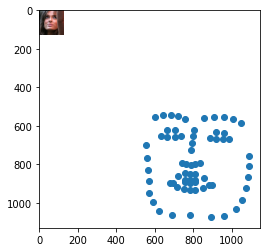

In [48]:
#without adaptation
plt.imshow(images_resize[0])
plt.scatter(np.array(landmarks[0])[:,0],np.array(landmarks[0])[:,1])

# with landmarks adaptation

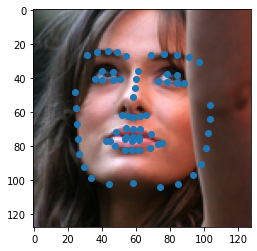

In [49]:
#with adatpation ldm
landmarks_ratio = []
for i in range(len(landmarks)):
    s = np.array(images[i].crop((bboxs_30[i][0], bboxs_30[i][2], bboxs_30[i][1], bboxs_30[i][3])))
    ratio_x = 128/s.shape[0]
    ratio_y = 128/s.shape[1]

    landmarks_ratio_i=[]
    for ldm in landmarks[i]:
        left = bboxs[i][0]
        top = bboxs[i][2]
        landmarks_ratio_i.append([float(ldm[0]-left+0.15*bboxs[i][1])*ratio_y, float(ldm[1]-top+0.15*bboxs[i][3])*ratio_x])
    landmarks_ratio.append(landmarks_ratio_i)

plt.imshow(images_resize[0])
plt.scatter(np.array(landmarks_ratio[0])[:,0],np.array(landmarks_ratio[0])[:,1])

# mean shape

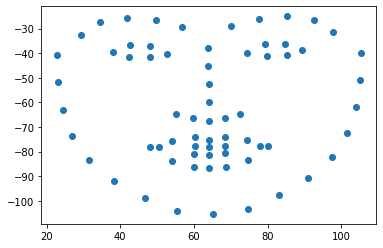

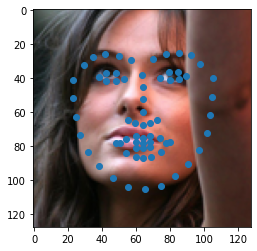

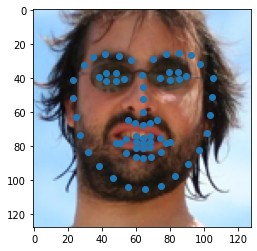

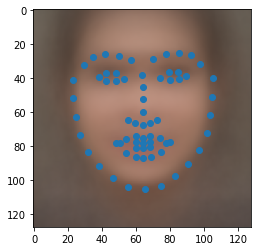

In [50]:
#mean
mean_shape = np.mean(np.array(landmarks_ratio), axis=0)
plt.scatter(mean_shape[:,0], -mean_shape[:,1])
plt.show()

#visualisation
plt.imshow(images_resize[0])
plt.scatter(np.array(mean_shape)[:,0],np.array(mean_shape)[:,1])
plt.show()
plt.imshow(images_resize[1])
plt.scatter(np.array(mean_shape)[:,0],np.array(mean_shape)[:,1])
plt.show()

#mean visualisation
mean_img=np.zeros((128,128,3))
for im in images_resize:
    mean_img += np.array(im)
mean_img/=len(images_resize)
plt.imshow(mean_img/255)
plt.scatter(np.array(mean_shape)[:,0],np.array(mean_shape)[:,1])

# data augmentation

In [51]:
#data augmentation
augmented_data = []
#for landmark in landmarks_ratio:
for i in range(10):
    tx=np.random.randint(-20,20)
    ty=np.random.randint(-20,20)
    sx=np.random.randint(-20,20)/100
    sy=np.random.randint(-20,20)/100
    landmark_cpy=[]
    for ldm in mean_shape:
        ldm0=ldm[0] + tx + ldm[0]*sx
        ldm1=ldm[1] + ty + ldm[1]*sy
        landmark_cpy.append([ldm0,ldm1])
    augmented_data.append(landmark_cpy)

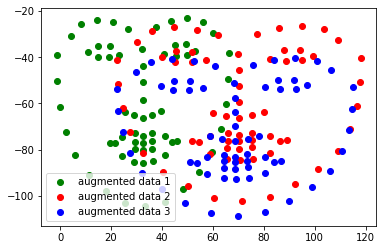

In [56]:
plt.scatter(np.array(augmented_data[0])[:,0],-np.array(augmented_data[0])[:,1], c="g")
plt.scatter(np.array(augmented_data[1])[:,0],-np.array(augmented_data[1])[:,1], c="r")
plt.scatter(np.array(augmented_data[2])[:,0],-np.array(augmented_data[2])[:,1], c="b")
plt.legend(["augmented data 1", "augmented data 2", "augmented data 3"])

# SIFT features

In [53]:
!pip install opencv-contrib-python==3.4.2.17

In [57]:
from tqdm import tqdm
kp_lst=[]

N=len(images_resize)*10
M=128*68
augmented_data = np.array(augmented_data)


for ldm in augmented_data:
    for kp in ldm:
        kp_lst.append(cv2.KeyPoint(kp[0], kp[1], 20))

siftobject = cv2.xfeatures2d.SIFT_create()
descriptors = []
for i in tqdm(range(len(images_resize))):
  img = np.array(images_resize[i])
  gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  for j in range(10):
        keypoint, descriptor = siftobject.compute(gray, kp_lst[j*68:j*68+68])
        #descriptors = np.array(descriptor).flatten().reshape((1,len(descriptor.flatten())))
        #descriptors=[np.array(descriptor).flatten().reshape((1,len(descriptor.flatten())))]
        #descriptors=np.concatenate((descriptors, np.array(descriptor).flatten().reshape((1,len(descriptor.flatten())))),axis=0)
        #descriptors.append(np.array(descriptor).flatten().reshape((1,len(descriptor.flatten()))))
        descriptors.append(descriptor)

descriptors = np.array(descriptors).reshape((10000, -1))

100%|██████████| 1000/1000 [01:12<00:00, 13.74it/s]


In [58]:
print(descriptors.shape)

(10000, 8704)


# Dimensionality reduction PCA

In [59]:
pca = PCA(0.98)
descriptors_p= pca.fit_transform(descriptors)
print(descriptors_p.shape)

(10000, 371)


In [60]:
#n=descriptors_p.shape[1]//68
#descriptors_p2 = descriptors_p[:,:n*68]
descriptors_p2 = descriptors_p
print(descriptors_p2.shape)

(10000, 371)


# Displacement estimation

In [88]:
indice = 4
indice_aug =0
#indice_aug = indice*10+1
descriptors_p=descriptors_p2.T
descriptors_p1 = descriptors_p

dela_star = augmented_data[indice_aug] - np.array(landmarks_ratio[indice])
descriptors_p1_ = np.vstack((descriptors_p1, np.ones((1,10000))))

reg = LinearRegression()
gt= np.repeat(landmarks_ratio, 10, axis = 0)
gt = gt.reshape(gt.shape[0],gt.shape[1]*gt.shape[2])
reg.fit(descriptors_p1_.T, gt)
print('score train : ' , reg.score(descriptors_p1_.T, gt))

score train :  0.5352119895316377


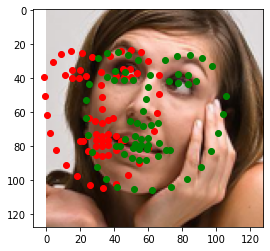

In [90]:
plt.imshow(images_resize[indice])
R=reg.predict(descriptors_p1_.T)

#plt.scatter(np.array(landmarks_ratio[indice])[:,0], (np.array(landmarks_ratio[indice])[:,1]))
plt.scatter(np.array(augmented_data[indice_aug])[:,0], (np.array(augmented_data[indice_aug])[:,1]), c='red')
#plt.scatter(np.array(augmented_data[indice_aug]-dela_star)[:,0], (np.array(augmented_data[indice_aug]-dela_star)[:,1]), c='orange')
plt.scatter(R[indice].reshape((68,2))[:,0],R[indice].reshape((68,2))[:,1], c='green')

# On test set

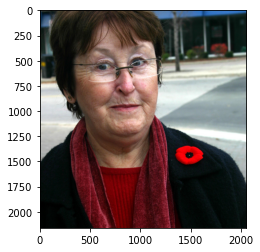

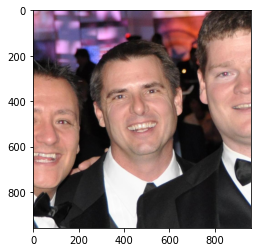

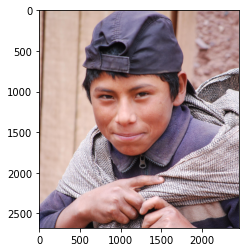

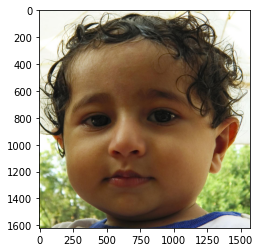

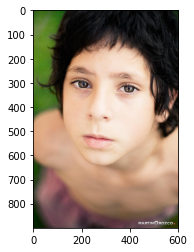

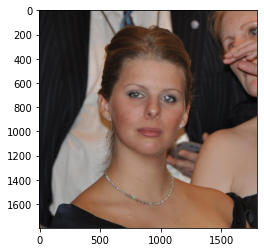

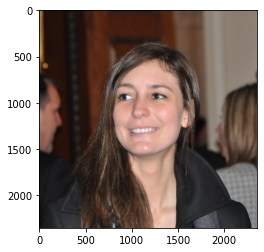

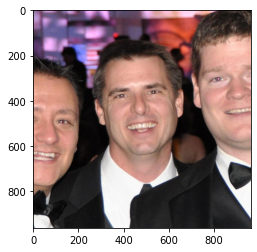

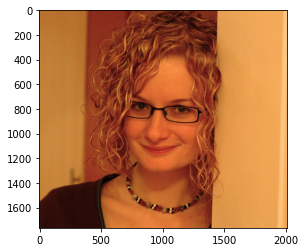

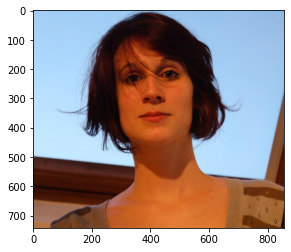

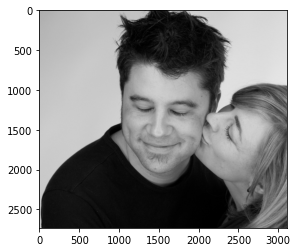

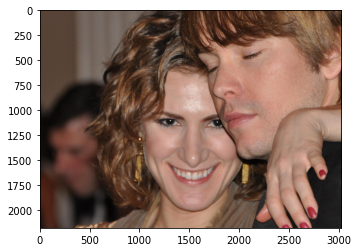

In [64]:
#test set

images_file_test = parse("helen_testset.txt")
plot_images_alea(images_file_test)
images_test = get_images(images_file_test)

bboxs_test=[]
landmarks_test=[]
for img in images_file_test:
    bb, ldm = Bbox(img)
    bboxs_test.append(bb)
    landmarks_test.append(ldm)

bboxs_30_test =[]
for bbox in bboxs_test:
    bboxs_30_test.append([bbox[0]-bbox[1]*0.15, bbox[1]+bbox[1]*0.15, bbox[2]-bbox[3]*0.15, bbox[3]+bbox[3]*0.15])

In [65]:
images_resize_test=[]

for i in range(len(images_test)):
    image_r = images_test[i].crop((bboxs_30_test[i][0],bboxs_30_test[i][2], bboxs_30_test[i][1], bboxs_30_test[i][3])).resize((128,128))
    if np.array(image_r).shape == (128,128,3):
      #image_r.save("gdrive/MyDrive/crop_resize/{}".format(images_file[i].split("/")[2].split("\n")[0]))
      images_resize_test.append(image_r)
    else:
      print("image not in 3 channels")

    if i%100 == 0:
      print("{}/{}".format(i,len(images_test)))


0/330
100/330
200/330
300/330


In [66]:
for i  in range(len(images_resize_test)):
  if np.array(images_resize_test[i]).shape != (128,128,3):
    landmarks_test.remove(i)
    images_test.remove(i)

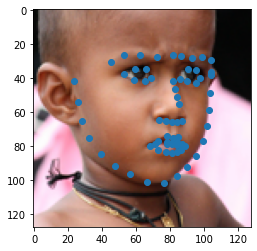

In [67]:
#avec adatpation des ldm
landmarks_ratio_test = []
for i in range(len(landmarks_test)):
    s = np.array(images_test[i].crop((bboxs_30_test[i][0], bboxs_30_test[i][2], bboxs_30_test[i][1], bboxs_30_test[i][3])))
    ratio_x = 128/s.shape[0]
    ratio_y = 128/s.shape[1]

    landmarks_ratio_i=[]
    for ldm in landmarks_test[i]:
        left = bboxs_test[i][0]
        top = bboxs_test[i][2]
        landmarks_ratio_i.append([float(ldm[0]-left+0.15*bboxs_test[i][1])*ratio_y, float(ldm[1]-top+0.15*bboxs_test[i][3])*ratio_x])
    landmarks_ratio_test.append(landmarks_ratio_i)

plt.imshow(images_resize_test[10])
plt.scatter(np.array(landmarks_ratio_test[10])[:,0],np.array(landmarks_ratio_test[10])[:,1])

In [68]:
kp_lst_test=[]
for ldm in landmarks_ratio_test:
    for kp in ldm:
        kp_lst_test.append(cv2.KeyPoint(kp[0], kp[1], 20))

siftobject = cv2.xfeatures2d.SIFT_create()
descriptors_test = []
for i in range(len(images_resize_test)):
  img = np.array(images_resize_test[i])
  gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  keypoint, descriptor = siftobject.compute(gray, kp_lst_test[i*68:i*68+68])
  descriptors_test.append(descriptor)

  if i%100==0:
    print(i)
  
descriptors_test = np.array(descriptors_test).reshape((330, -1))

0
100
200
300


In [69]:
descriptors_test.shape

(330, 8704)

In [70]:
descriptors_p_test= pca.transform(descriptors_test)
descriptors_p2_test = np.hstack((descriptors_p_test, np.ones((330,1))))
print(descriptors_p2_test.shape)

(330, 372)


score test :  0.005390520875867601


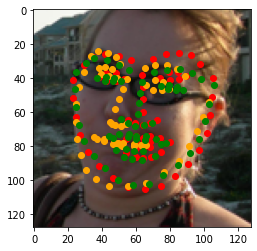

In [100]:
R = reg.predict(descriptors_p2_test)

gt= np.array(landmarks_ratio_test)
gt = gt.reshape(gt.shape[0],gt.shape[1]*gt.shape[2])

print('score test : ' , reg.score(descriptors_p2_test, gt))

indice = 4
indice_aug = 12
#dela_star = augmented_data[indice_aug] - np.array(landmarks_ratio[indice])
dela_star = mean_shape - np.array(landmarks_ratio_test[indice])

plt.imshow(images_resize_test[indice])
#plt.scatter(np.array(landmarks_ratio_test[indice])[:,0], (np.array(landmarks_ratio_test[indice])[:,1]))
#plt.scatter(np.array(augmented_data[indice_aug])[:,0], (np.array(augmented_data[indice_aug])[:,1]), c='red')
#plt.scatter(np.array(augmented_data[indice_aug]-dela_star)[:,0], (np.array(augmented_data[indice_aug]-dela_star)[:,1]), c='orange')

plt.scatter(np.array(mean_shape)[:,0], (np.array(mean_shape)[:,1]), c='red')
plt.scatter(np.array(mean_shape-dela_star)[:,0], (np.array(mean_shape-dela_star)[:,1]), c='orange')
plt.scatter(R[indice].reshape((68,2))[:,0],R[indice].reshape((68,2))[:,1], c='green')

# With data augmentation on the landmarks

In [ ]:
"""
#data augmentation
augmented_data = []
for landmark in landmarks_ratio:
    for i in range(10):
        tx=np.random.randint(-20,20)
        ty=np.random.randint(-20,20)
        sx=np.random.randint(-20,20)/100
        sy=np.random.randint(-20,20)/100
        landmark_cpy=[]
        for ldm in landmark:
            ldm0=ldm[0] + tx + ldm[0]*sx
            ldm1=ldm[1] + ty + ldm[1]*sy
            landmark_cpy.append([ldm0,ldm1])
        augmented_data.append(landmark_cpy)
     
#sift features in train
kp_lst=[]
N=len(images_resize)*10
M=128*68
augmented_data = np.array(augmented_data)


for ldm in augmented_data:
    for kp in ldm:
        kp_lst.append(cv2.KeyPoint(kp[0], kp[1], 20))

k=0
siftobject = cv2.xfeatures2d.SIFT_create()
for i in range(N):
    if i%10==0 and i!=0:
        k+=1
        if k%100==0:
          print(k)
    img = np.array(images_resize[k])
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    keypoint, descriptor = siftobject.compute(gray, kp_lst[i*68:i*68+68])
    if i==0:
        descriptors = np.array(descriptor).flatten().reshape((1,len(descriptor.flatten())))
    else:
        descriptors=np.concatenate((descriptors, np.array(descriptor).flatten().reshape((1,len(descriptor.flatten())))),axis=0)
        
# Sift features in test
kp_lst_test=[]
N=len(images_resize_test)
M=128*68

for ldm in landmarks_ratio_test:
    for kp in ldm:
        kp_lst_test.append(cv2.KeyPoint(kp[0], kp[1], 20))

k=0
siftobject = cv2.xfeatures2d.SIFT_create()
for i in range(N):
    img = np.array(images_resize_test[i])
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    keypoint, descriptor = siftobject.compute(gray, kp_lst_test[i*68:i*68+68])
    if i==0:
        descriptors_test = np.array(descriptor).flatten().reshape((1,len(descriptor.flatten())))
    else:
        descriptors_test=np.concatenate((descriptors_test, np.array(descriptor).flatten().reshape((1,len(descriptor.flatten())))),axis=0)
"""